# 0 Workshop Outline
---



This is not an introductory python course. If you have no prior experience in python, visiting an intro online course to python is recommended before you proceed.

The aim of this workshop is to give you a little taste for how geoscientists can use python in their work. We want to show you a way to easily built and modify 2D/3D structural models that can subsequently be populated with facies and petrophysical properties with the help basic geostatistical algorithms.
One of the main advantages of doing this work in python is that by taking a step away from "black box" modelling software you get a better understanding of the modelling approaches you apply. It also allows for easy reproduction, data manipulation and customisable visualisation. Working within python also gives you access to other libraries, such as state-of-the-art machine learning packages to further delve into the workings and uncertainties of your models.  On top of that, it is all open source and free to use for everyone. 

The outline of this notebook is as follows: After succesfully installing and importing all the required packages we will first we give an introduction to gempy  -a package within python that is made for building 3D structural models of the subsurface with different layers etc. After we have a base model setup and are in control of a couple of basic visualisations and data configuration functions we go over to pykrige – a python package for kriging. Finally we export the properties in a format ready for tnav/eclipse to read. 

by Quentin Corlay and Bastian Steffens


# 01 Install Dependencies
---


### The boring part


- Before running the tutorial, execute the lines of code and follow the instructions in the upcoming lines in sequential order to get all the packages that are required for this workshop to successfully run. One of the downsides of Google Colab is that it has not got ananconda running which requires us to install miniconda prior to installing the other depencies.


In [1]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-06-21 09:38:47--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-06-21 09:38:47--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 8.85M 6s
    50K .......... .......... .......... .......... ..........  0%

In [2]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    chardet-4.0.0              |py36h06a4308_1003         213 KB
    libgomp-9.3.0              |      h5101ec6_17         378 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    urllib3-1.26.4             |     pyhd3eb1b0_0          99 KB
    _openmp_mutex-4.5          |            1_gnu          22 KB
    readline-8.1               |       h27cfd23_0         464 KB
    ca-certificates-2021.5.25  |       h06a4308_1         118 KB
    libstdcxx-ng-9.3.0         |      hd4cf53a_17         4.0 MB
    tqdm-4.59.0                |     pyhd3eb1b0_1          90 KB
    _libgcc_mutex-0.1          |             main           3 KB
    pyopenssl-20.0.1           |     pyhd3eb1b0_1   

chardet-4.0.0        |  213 KB | ########## | 100% 
libgomp-9.3.0        |  378 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
urllib3-1.26.4       |   99 KB | ########## | 100% 
_openmp_mutex-4.5    |   22 KB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
ca-certificates-2021 |  118 KB | ########## | 100% 
libstdcxx-ng-9.3.0   |  4.0 MB | ########## | 100% 
tqdm-4.59.0          |   90 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
pyopenssl-20.0.1     |   48 KB | ########## | 100% 
ruamel_yaml-0.15.100 |  268 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
cryptography-3.4.7   |  1.0 MB | ########## | 100% 
pip-21.1.2           |  2.1 MB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
requests-2.25.1      |   51 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  637 KB | ########## | 100% 
conda-package-handli |  946 KB | ########## | 100% 
wheel-0.36.2

In [3]:
import sys
sys.path
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

In [4]:
!conda install --channel conda-forge featuretools --yes
!conda install theano --yes
!conda install -c anaconda vtk --yes


Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

**+++ Note +++**

- After executing the following cell, in the end you could get the message to restart the runtime. Please DO NOT restart it, just keep following the steps normally. Also IGNORE the pip warning messages

In [5]:
# gempy dependencies
!pip install PySide2
!pip install pyqt5
!pip install pyvista
!pip install pydot
!pip install graphviz
# structural modelling 
!pip install gempy
# property modelling
!pip install gstools
!pip install PyKrige

     |████████████████████████████████| 164.3 MB 2.7 kB/s 
     |████████████████████████████████| 956 kB 44.0 MB/s 
     |████████████████████████████████| 8.3 MB 13.2 MB/s 
     |████████████████████████████████| 313 kB 47.9 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 12.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 48.1 MB/s 
     |████████████████████████████████| 158 kB 52.2 MB/s 
  Created wheel for transforms3d: filename=transforms3d-0.3.1-py3-none-any.whl size=59374 sha256=89b08ac2e5a19c771d0ad5c0a93af263ed9313ee8db7c3bb8310a46ffab53c69
  Stored in directory: /root/.cache/pip/wheels/be/7a/eb/465e9bb085af816c4d504821d542cc0059cc3433f6e8edea3c
Successfully built transforms3d
     |████████████████████████████████| 446 kB 12.6 MB/s 
     |████████████████████████████████| 11.5 MB 251 kB/s 
     |████████████████████████████████| 785 kB 39.5 MB/s 
    

     |████████████████████████████████| 1.2 MB 13.0 MB/s 
     |████████████████████████████████| 41 kB 696 kB/s 
     |████████████████████████████████| 532 kB 48.2 MB/s 
     |████████████████████████████████| 957 kB 13.4 MB/s 


# 02 Importing Dependencies
---


### More boring bits


- After downloading and installing all the dependencies it is now time to import the previously installed and preinstalled dependencies into this notebook so that we can work with them.

In [6]:
# visualisation library
import pyvista as pv
# if error message pops up during gempy import, go into the vista.py file where error pop up and replace errornes part with line below.
from pyvista import parse_color #change it in the vista.py file
# structural modelling library
import gempy as gp
# property modelling library
import pykrige
# import gstools as gs
from pykrige.uk import UniversalKriging
from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D
# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from datetime import datetime
import scipy.stats as stats

# Setting options
random.seed(32463)
np.random.seed(1515)
pd.set_option('precision', 2)
print("You're finally all set up and ready to go!")

You're finally all set up and ready to go!


# 03 Structural modelling in Python - GemPy basics
---



![picture](https://drive.google.com/uc?id=1-SfVFsHzCdLZ-7T7beSpOcHL6Ddt6Cix)

- In this section we will work with a package called GemPy. GemPy was built for geologists and subsurface enthusiasts and allows us to translate our geological knowlege into 3D structural models.
- The modelling approach is based upon a co-kriging interpolation method that only requires the user to provide the interpolation algorithm with surface contact points (boundary between 2 layers) and orientation measurements. These data can either be imported from an existing csv file or you can add them manually 
- Features that can be modelled include : Sedimentary layers, several sequences of layers (conformal continuation or unconformities), magmatic bodies, faults, fault networks and Folds
- Easy implemtation of stochastic modelling makes it a great tool to explore and quantify geological uncertainties  
- For a full description of GemPy plus several examples and tutorials visit: www.gempy.org
- If your interested in the theory or plan to use GemPy in your work, make sure to reference this paper https://gmd.copernicus.org/articles/12/1/2019/  
 


### Getting started - importing data and initiating instance of gempy model

- In this part of the workshop we will built a model based upon input data we import from gempys github page. The model consists of several units that are offset by a normal fault. 
- Afterwards creating the first model, we will modfiy some of the import data to see what the impact is on the generated strucutral models. These data are x, y and y positional values for all surface points and orientation measures. Orientational measures also come with a pole, azimuth and polarity value. The surface points also have to have a formation name assigned to them. Attached an example of how the surface points input file could look like:

![picture](https://drive.google.com/uc?id=1-z1mzwm1AQAZUyPY_notTQE82f_XI8TW)


- The first thing to do is to create an instance of the gempy model class that will be used to store all the input data and calculations performed further down the road.
- Another important input we have to define here is the size as well as the resolution of the geomodel we want to work with. For the purpose of this tutorial and to prevent longer runtimes, we go with a low resolution. Generating models of high resolution (e.g. >3 million cells) will become very RAM demanding.


In [7]:
# create instance of gempy model class and name it
geo_model = gp.create_model('Base_model')

#define path where csv-files are stored
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 2000., 0, 2000., 0, 750.], [100, 50, 100],
             path_o=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_orientations.csv",
             path_i=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_points.csv",
             default_values=True)

Active grids: ['regular']


Base_model  2021-06-21 09:46

### Review input data 


With the help of the get_data function we can now have a look at the tables of the imported surface points and orientational measures.

In [8]:
gp.get_data(geo_model, 'surface_points').head()


,X,Y,Z,smooth,surface
0,1000,50,450.00,2.00e-06,Shale
1,1000,150,433.33,2.00e-06,Shale
2,1000,300,433.33,2.00e-06,Shale
3,1000,500,466.67,2.00e-06,Shale
4,1000,1000,533.33,2.00e-06,Shale


In [9]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1000,1000,300,0.32,1.00e-12,0.95,0.01,Shale
1,400,1000,420,0.32,1.00e-12,0.95,0.01,Sandstone_2
2,500,1000,300,-0.95,1.00e-12,0.32,0.01,Main_Fault


We can also visualise the input data (2D only in colab)

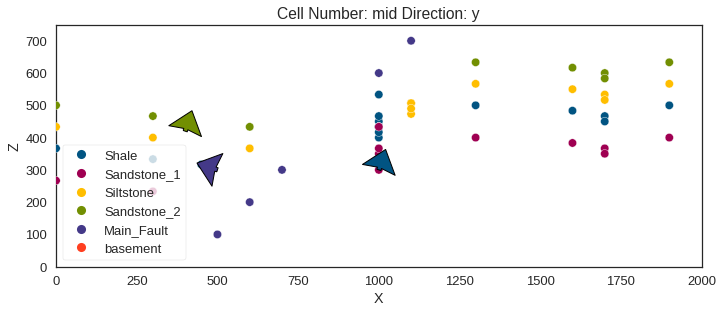

In [10]:
gp.plot_2d(geo_model, show_lith=True, show_boundaries=True)

### Define stratigraphic sequences and faults

- Up until this point we have not declared any age relationships between the different surfaces we imported previously. Also, we have not told gempy yet if some of the data points belong to a fault instead of a stratigraphic series and if there are numerous stratigraphic series with unconformable relationships. 
- This is taken care of with the stack_to_surfaces function. Our model consists of four layers, an automatically generated basement and a normal fault. The layers in our model were deposited sequentially and can therefore all be assigned to a single stratigraphic series. The fault has to be assigend to a fault series. 
- After executing the next box of code, you will see that each surface is assigned to a series, in our case either fault or stratigraphic series and the order of the surfaces is also defined

In [11]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('Shale', 'Sandstone_1',
                                           'Siltstone', 'Sandstone_2', 'basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
4,Main_Fault,Fault_Series,1,#443988,1
0,Shale,Strat_Series,1,#015482,2
1,Sandstone_1,Strat_Series,2,#9f0052,3
2,Siltstone,Strat_Series,3,#ffbe00,4
3,Sandstone_2,Strat_Series,4,#728f02,5
5,basement,Strat_Series,5,#ff3f20,6


It is also required to define the fault as a fault with the function set_is_fault.

In [12]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False


### Model generation

- To speed up the generation of models, gempy utilizes a library called theano, that requires us to compile our code before running it. 

In [13]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            2.9e+03
$C_o$              2e+05
drift equations   [3, 3]


- Time to finally built the model!

In [14]:
gp.compute_model(geo_model)


/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfa


Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 

- Lets have a look at it

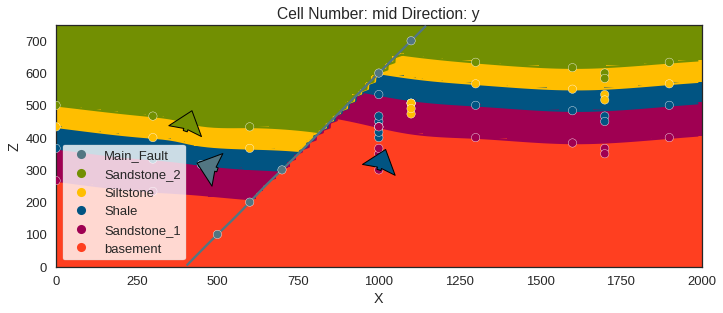

In [15]:
gp.plot_2d(geo_model, show_data=True)

### Modify dip of fault

- Maybe we are not that happy with the dip of that fault? No problem!
- the modify_surface_points function allows us to change the surface point input
- if we want to change around specific orientation points, we can do so with the modify_orientations function
- Adding or removing new points and orientations is also easily achievable with gempy 

In [16]:
# identify Main_fault point location  that require changing
gp.get_data(geo_model, 'surface_points').head(10)

,X,Y,Z,smooth,surface
52,700,1000,300.00,2.00e-06,Main_Fault
53,600,1000,200.00,2.00e-06,Main_Fault
54,500,1000,100.00,2.00e-06,Main_Fault
55,1000,1000,600.00,2.00e-06,Main_Fault
56,1100,1000,700.00,2.00e-06,Main_Fault
44,0,1000,500.00,2.00e-06,Sandstone_2
45,300,1000,466.67,2.00e-06,Sandstone_2
46,600,1000,433.33,2.00e-06,Sandstone_2
47,1300,1000,633.33,2.00e-06,Sandstone_2
48,1600,1000,616.67,2.00e-06,Sandstone_2


In [17]:
# fault surface points indices = 52-56
geo_model.modify_surface_points(indices= 52,recompute_rescale_factor=True, X = 700)
geo_model.modify_surface_points(indices= 53,recompute_rescale_factor=True, X = 650)
geo_model.modify_surface_points(indices= 54,recompute_rescale_factor=True, X = 600)
geo_model.modify_surface_points(indices= 55,recompute_rescale_factor=True, X = 850)
geo_model.modify_surface_points(indices= 56,recompute_rescale_factor=True, X = 900)


,X,Y,Z,smooth,surface
52,700,1000,300.00,2.00e-06,Main_Fault
53,650,1000,200.00,2.00e-06,Main_Fault
54,600,1000,100.00,2.00e-06,Main_Fault
55,850,1000,600.00,2.00e-06,Main_Fault
56,900,1000,700.00,2.00e-06,Main_Fault
44,0,1000,500.00,2.00e-06,Sandstone_2
45,300,1000,466.67,2.00e-06,Sandstone_2
46,600,1000,433.33,2.00e-06,Sandstone_2
47,1300,1000,633.33,2.00e-06,Sandstone_2
48,1600,1000,616.67,2.00e-06,Sandstone_2


- Recompute and have a look at it

In [18]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            2.9e+03
$C_o$              2e+05
drift equations   [3, 3]


In [19]:
gp.compute_model(geo_model)

/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfa


Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 

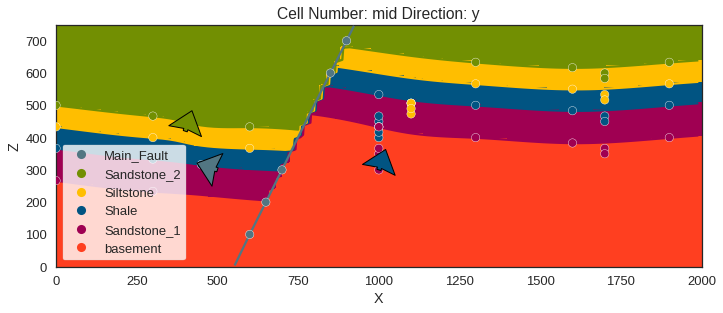

In [20]:
gp.plot_2d(geo_model, show_data=True)

### Bad input = Bad output

- Similar to all modelling tools is garbage in = garbage out
- The interpolation algorithm will try to make thinks work with your input, which can lead to some very unrealistic formations
- if performing stochastic modelling, make sure that parameters you vary around create sensible models in the extreme cases 

In [21]:
geo_model.modify_surface_points(indices= 52,recompute_rescale_factor=True, X = 900)

,X,Y,Z,smooth,surface
52,900,1000,300.00,2.00e-06,Main_Fault
53,650,1000,200.00,2.00e-06,Main_Fault
54,600,1000,100.00,2.00e-06,Main_Fault
55,850,1000,600.00,2.00e-06,Main_Fault
56,900,1000,700.00,2.00e-06,Main_Fault
44,0,1000,500.00,2.00e-06,Sandstone_2
45,300,1000,466.67,2.00e-06,Sandstone_2
46,600,1000,433.33,2.00e-06,Sandstone_2
47,1300,1000,633.33,2.00e-06,Sandstone_2
48,1600,1000,616.67,2.00e-06,Sandstone_2


In [22]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            2.9e+03
$C_o$              2e+05
drift equations   [3, 3]


In [23]:
gp.compute_model(geo_model)

/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfa


Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 

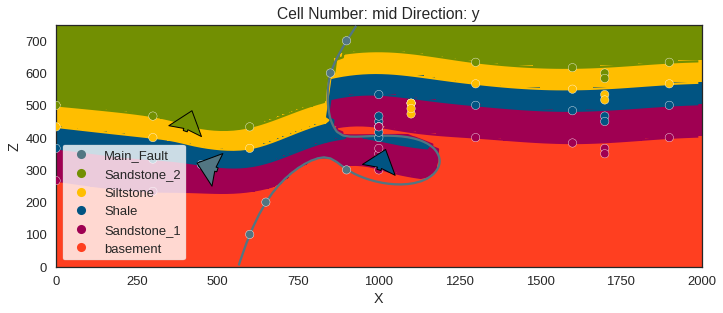

In [24]:
gp.plot_2d(geo_model, show_data=True)

### Export model into 3D array

- Finally, to perform the next steps of populating the model with properties, it is required to extract the model in form of a numpy 3D array

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            2.9e+03
$C_o$              2e+05
drift equations   [3, 3]


/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))
/usr/local/lib/python3.6/site-packages/gempy/core/solution.py:355: UserWarning: Surfa

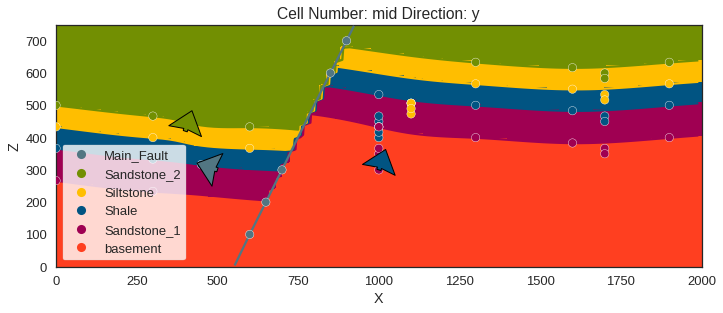

In [25]:
# reset to normal setting
geo_model.modify_surface_points(indices= 52,recompute_rescale_factor=True, X = 700)
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )
gp.compute_model(geo_model)
#double check
gp.plot_2d(geo_model, show_data=True)

In [26]:
# extract lithologies
lithologies_array = geo_model.solutions.lith_block.reshape(geo_model.grid.regular_grid.resolution).astype('int64')
# lithologies_array = np.flip(lithologies_array)
lithologies_array = np.flip(lithologies_array, 2)
# extract faultblocks
fault_blocks_array = geo_model.solutions.block_matrix[0,0,:].reshape(geo_model.grid.regular_grid.resolution).astype('int64')
fault_blocks_array = np.flip(fault_blocks_array, 2)

- Double check if every single layer has been extracted

In [27]:
lithologies_array.shape

(100, 50, 100)

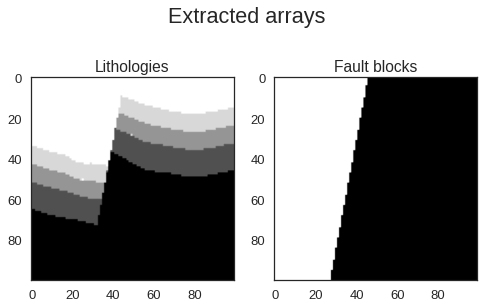

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(lithologies_array[:,25].T)
# axs[0].invert_yaxis()
axs[0].title.set_text('Lithologies')
# plt.colorbar(cax=axs[0])
axs[1].imshow(fault_blocks_array[:,25].T)
# axs[1].invert_yaxis()
axs[1].title.set_text('Fault blocks')
fig.suptitle('Extracted arrays')
plt.show()

- Not only the different layers but also other things such as the fault zones can be extracted as a 3D array to perform further work on

# 04 Property modeling

### Petrophyisical property modelling

![picture](https://drive.google.com/uc?id=1t-TaFgQtG8gH-DjM90hmke41_3IHxu_B)


- In this section we will work with a package called PyKrige. Pykrige is a python library to perform 2D and 3D ordinary and universal kriging. 
- Here we populate the structural model previously generated with facies properties  
- For a full description of PyKrige plus several examples and tutorials visit:  http://pykrige.readthedocs.io/
- Copyright notice: Copyright (c) 2015-2020, PyKrige Developers




### Kriging with Pykrige - Parameters

[documentation UniversalKriging class](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/generated/pykrige.uk.UniversalKriging.html?highlight=UniversalKriging)

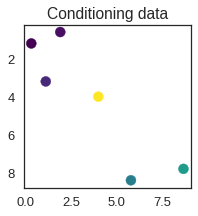

In [29]:
#define 2D grid and conditioning data
gridx = np.arange(0., 10., 1)
gridy = np.arange(0., 10., 1)

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [4., 4., 2.8],
                 [5.8, 8.4, 1.47],
                 [8.7, 7.8, 1.74],]) #[x_position, y_position, value]

plt.figure(figsize=(3,3))
plt.scatter(data[:, 0],data[:, 1], c=data[:, 2], s=100, cmap='viridis', vmin=data[:,2].min(), vmax=data[:,2].max())
plt.gca().invert_yaxis()
plt.title('Conditioning data')
plt.show()

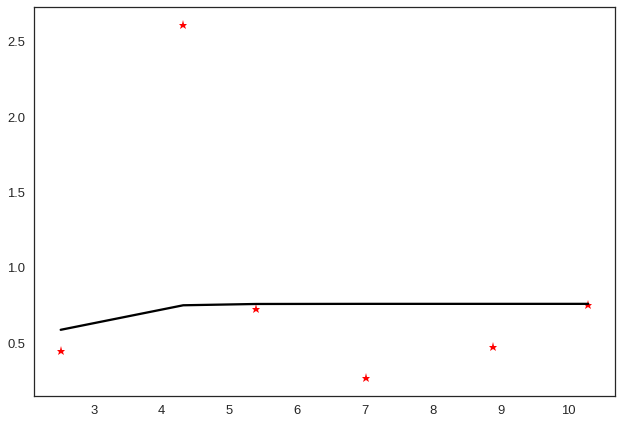

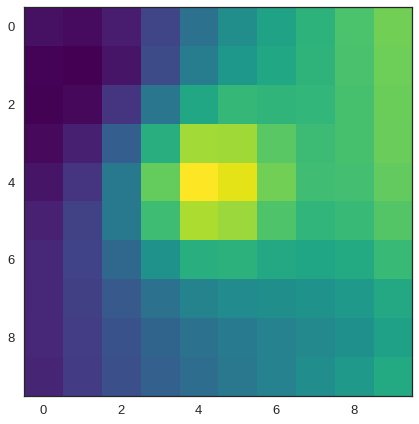

In [30]:
# enable_plotting = True
UK = UniversalKriging(
      data[:, 0],
      data[:, 1],
      data[:, 2],
      variogram_model="gaussian",
      drift_terms=["regional_linear"],
      enable_plotting = True
  )
z, ss = UK.execute("grid", gridx, gridy)

plt.imshow(z, cmap='viridis', vmin=data[:,2].min(), vmax=data[:,2].max())
plt.show()

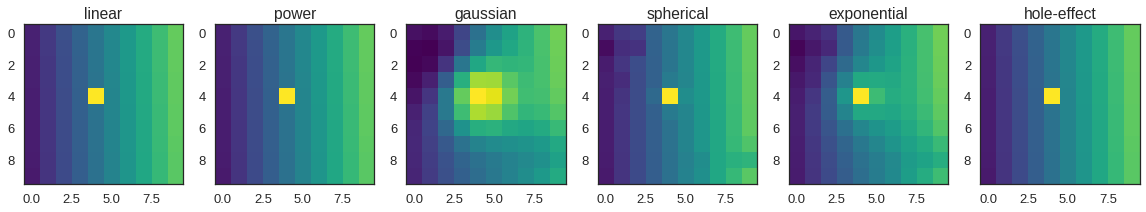

In [31]:
#Kriging on a 2D example - study variogram types

variogram_types = ["linear", "power", "gaussian", "spherical", "exponential", "hole-effect"]

fig, axs = plt.subplots(1, len(variogram_types), figsize=(20,7))

for i in range(len(variogram_types)):

  UK = UniversalKriging(
      data[:, 0],
      data[:, 1],
      data[:, 2],
      variogram_model=variogram_types[i],
      drift_terms=["regional_linear"],
  )

  z, ss = UK.execute("grid", gridx, gridy)

  axs[i].imshow(z, cmap='viridis', vmin=data[:,2].min(), vmax=data[:,2].max())
  axs[i].title.set_text(variogram_types[i])
plt.show()

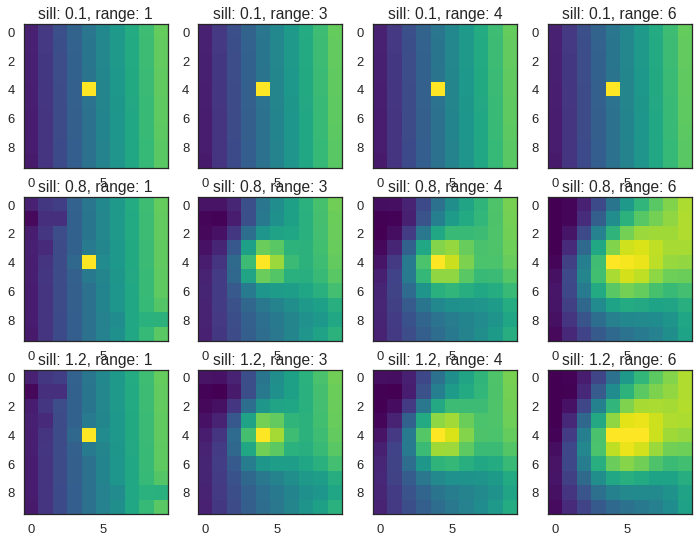

In [32]:
#Kriging on a 2D example - study variogram parameters sill and range

ranges = [1, 3, 4, 6]
sills = [0.1, 0.8, 1.2]

fig, axs = plt.subplots(len(sills), len(ranges), figsize=(12,9))

for i in range(len(ranges)):
  for j in range(len(sills)):
    UK = UniversalKriging(
        data[:, 0],
        data[:, 1],
        data[:, 2],
        variogram_model="gaussian",
        variogram_parameters = {'sill': sills[j], 'range': ranges[i], 'nugget': 0.1},
        drift_terms=["regional_linear"],
    )

    z, ss = UK.execute("grid", gridx, gridy)
    axs[j, i].imshow(z, cmap='viridis', vmin=data[:,2].min(), vmax=data[:,2].max())
    axs[j, i].title.set_text("sill: {}, range: {}".format(sills[j], ranges[i]))
plt.show()

### Populate structural model - define facies property proportions and anisostropy direction

[<img src="https://drive.google.com/uc?id=11Z-_sJalSl1Rln77Y5_Ktge5xkKvgCsk" width="150"/>](https://drive.google.com/uc?id=11Z-_sJalSl1Rln77Y5_Ktge5xkKvgCsk)

In [33]:
# Define facies property proportions for each unit
map_lithology_property = {
                2 : ["Sd", 0.8],    #lithology_ID: [Shale (Sh) or Sand (Sd) dominated, proportion (0-1)]
                3 : ["Sh", 0.8],
                4 : ["Sd", 0.6],
                5 : ["Sh", 0.6],
                6 : ["Sd", 0.75],
                }

In [34]:
def flatten_layer(X, Y, Z):
    """ From 3D positions, returns the flatten Z values """
    Z_flat = Z.copy()
    X_unique = np.unique(X)
    for x in X_unique:
        X_filter = X==x
        Y_unique = np.unique(Y[X_filter])
        for y in Y_unique:
            Y_filter = (X==x) & (Y==y)
            z_offset = np.min(Z[Y_filter])
            Z_flat[Y_filter] -= z_offset
    return Z_flat

In [46]:
tunit_pop = datetime.now()
print('==Populating flow properties with Universal Kriging==')
populated_facies_array = np.zeros(lithologies_array.shape)

#populate fault blocks by fault blocks and lithology by lithology
for ifault_block in [1, 2]:#np.unique(fault_blocks_array):
    (gridx, gridy, gridz) = np.where(fault_blocks_array == ifault_block)
    Block_pos = [(gridx[i], gridy[i], gridz[i]) for i in range (len(gridx))]
    for ilithology in list(map_lithology_property.keys()):
        print('* Populating unit: {} and fault block: {}'.format(ilithology, ifault_block))

        #extract grid coordinates to populate - intersection of lithology and fault block
        (gridx, gridy, gridz) = np.where(lithologies_array == ilithology)
        Unit_pos = [(gridx[i], gridy[i], gridz[i]) for i in range(len(gridx))]
        Intersection_pos = list(set(Unit_pos) & set(Block_pos))

        if not Intersection_pos:
            print('0 cells')
            pass

        else:
            X_a = np.array(list(map(lambda x: x[0], Intersection_pos)))
            Y_a = np.array(list(map(lambda x: x[1], Intersection_pos)))
            Z_a = np.array(list(map(lambda x: x[2], Intersection_pos)))
            print('number of grid points: {}'.format(len(X_a)))
            #so for little number of cells, randomly sample from distribution of facies
            if len(X_a)<=10: #kriging doesnt work with only 2 gridcells
                if map_lithology_property[ilithology][0] == "Sd":
                    gridv = np.random.choice(3, len(X_a), p=[0.85*(1-map_lithology_property[ilithology][1]), 
                                                            0.15*(1-map_lithology_property[ilithology][1]), 
                                                            map_lithology_property[ilithology][1]])
                else:
                    gridv = np.random.choice(3, len(X_a), p=[map_lithology_property[ilithology][1], 
                                                            0.15*(1-map_lithology_property[ilithology][1]), 
                                                            0.85*(1-map_lithology_property[ilithology][1])])
                print("Cell numbers too little for kriging -> randomly initited from distribution")

            else:
                if ilithology == 2:
                    #no need to flatten for top layer
                    Z_flat = Z_a.copy()
                else:
                    #flatten the layer to perform kriging
                    #allows kriging to follow stratigraphy
                    Z_flat = flatten_layer(X_a, Y_a, Z_a)
                #__initiate constraint points__
                ninit =  min(70, int(0.1 * len(X_a))) #number of points to initiate
                if not ninit:
                    ninit = 1
                Linit = np.random.choice(X_a.size, ninit, replace=False)
                #grid coordinates of initiated values
                gridx_init = X_a[Linit]
                gridy_init = Y_a[Linit]
                gridz_init = Z_flat[Linit]
                
                #random choice of initiated values from distribution
                if map_lithology_property[ilithology][0] == "Sd":
                    gridv_init = np.random.choice(3, ninit, p=[0.85*(1-map_lithology_property[ilithology][1]), 
                                                                0.15*(1-map_lithology_property[ilithology][1]), 
                                                                map_lithology_property[ilithology][1]])
                else:
                    gridv_init = np.random.choice(3, ninit, p=[map_lithology_property[ilithology][1], 
                                                                0.15*(1-map_lithology_property[ilithology][1]), 
                                                                0.85*(1-map_lithology_property[ilithology][1])])
                
                # print("Randomly initiating {} values from distribution".format(ninit))

                # covmodel = gs.Gaussian(dim=3, var=0.5, len_scale=8, anis=[1.0, 1.0], nugget=0.1)

                ###_____populate the rest of the grid with Universal Kriging____
                #####################################################################
                #################Kriging parameters to modify########################
                #####################################################################
                #For simplicity here, the same parameters are applied to each unit to populate
                ok3d = UniversalKriging3D(
                    gridx_init, gridy_init, gridz_init, gridv_init, 
                    variogram_model="gaussian",       #"linear", "power", "gaussian", "spherical", "exponential", "hole-effect"
                    variogram_parameters = {'sill': 0.4, 'range': 20, 'nugget': 0.1},   
                    anisotropy_scaling_z = 6,     #anisotropy in the z direction (x/z)
                    verbose=False,
                    # enable_plotting = True
                )
                k3d, _ = ok3d.execute("points", X_a.astype(dtype="float64"), Y_a.astype(dtype="float64"), Z_flat.astype(dtype="float64"))
                gridv = k3d.data
                gridv[gridv < 0.85] = 0
                gridv[gridv > 1.15] = 2
                gridv = np.rint(gridv)
            unique, counts = np.unique(gridv, return_counts=True)
            print('Flow property values unique {}, counts {}'.format(unique, counts))
            populated_facies_array[X_a, Y_a, Z_a] = gridv
print('Flow facies modeling time {}'.format(datetime.now()-tunit_pop))

==Populating flow properties with Universal Kriging==
* Populating unit: 2 and fault block: 1
number of grid points: 97928
Flow property values unique [0. 1. 2.], counts [  903  2160 94865]
* Populating unit: 3 and fault block: 1
number of grid points: 15739
Flow property values unique [0. 1. 2.], counts [14229   901   609]
* Populating unit: 4 and fault block: 1
number of grid points: 14753
Flow property values unique [0. 1. 2.], counts [  820  1351 12582]
* Populating unit: 5 and fault block: 1
number of grid points: 20607
Flow property values unique [0. 1. 2.], counts [13051  3545  4011]
* Populating unit: 6 and fault block: 1
number of grid points: 35851
Flow property values unique [0. 1. 2.], counts [ 5661  4738 25452]
* Populating unit: 2 and fault block: 2
number of grid points: 55779
Flow property values unique [0. 1. 2.], counts [ 2986  3958 48835]
* Populating unit: 3 and fault block: 2
number of grid points: 26862
Flow property values unique [0. 1. 2.], counts [25242  1171  

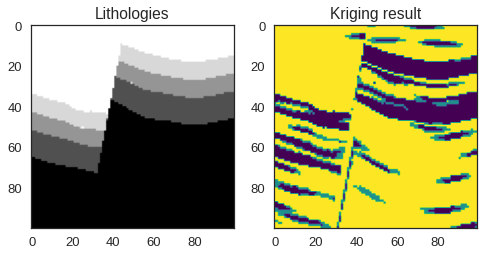

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(lithologies_array[:,25].T, cmap='Greys')
axs[0].title.set_text('Lithologies')
axs[1].imshow(populated_facies_array[:,25].T, cmap='viridis')#'cividis')
axs[1].title.set_text('Kriging result')
plt.show()

### Petrophysical properties

- At the moment co-kriging is not possible with the Pykrige package, but meant to be released by with the new version. 
- Therefore, here we will just randomly sample from a predefined distribution for each facies to determine porosity
- Python however also allows you to make use and try out different modelling and data integration methods alltogher. 


In [48]:
populated_facies_array_flattened = populated_facies_array.flatten() 

In [49]:
import numpy as np
elements = [0, 1, 2]
probabilities = [0.2, 0.5, 0.3]
facies = np.random.choice(elements, 125000, p=probabilities)
#flatten facies

In [50]:
minval_shale = 0
maxval_shale = 0.99
meanval_shale = 0.03
stdval_shale = 0.02
minval_silt = 0
maxval_silt = 0.99
meanval_silt = 0.1
stdval_silt = 0.1
minval_sand = 0
maxval_sand = 0.99
meanval_sand = 0.3
stdval_sand = 0.1
sampler_shale = stats.truncnorm((minval_shale - meanval_shale) / stdval_shale, (maxval_shale - meanval_shale) / stdval_shale, loc=meanval_shale, scale=stdval_shale)
sampler_silt = stats.truncnorm((minval_silt - meanval_silt) / stdval_silt, (maxval_silt - meanval_silt) / stdval_silt, loc=meanval_silt, scale=stdval_silt)
sampler_sand = stats.truncnorm((minval_sand - meanval_sand) / stdval_sand, (maxval_sand - meanval_sand) / stdval_sand, loc=meanval_sand, scale=stdval_sand)

In [54]:
porosity = []
for i in range(len(populated_facies_array_flattened)):
  if populated_facies_array_flattened[i] == 0:   
    porosity.append(sampler_shale.rvs(1)[0])
  elif populated_facies_array_flattened[i] == 1:
    porosity.append(sampler_silt.rvs(1)[0])
  elif populated_facies_array_flattened[i] == 2:
    porosity.append(sampler_sand.rvs(1)[0])
  
# reshape it to 3D array
porosity = np.array(porosity).reshape((100,50,100))
porosity = np.round(porosity,3)

visualize porosity 2D slice

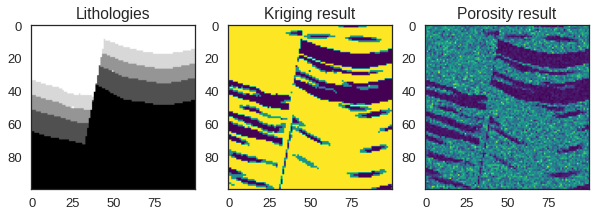

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(lithologies_array[:,25].T, cmap='Greys')
axs[0].title.set_text('Lithologies')
axs[1].imshow(populated_facies_array[:,25].T, cmap='viridis')#'cividis')
axs[1].title.set_text('Kriging result')
axs[2].imshow(porosity[:,25].T, cmap='viridis')#'cividis')
axs[2].title.set_text('Porosity result')
plt.show()

# 05 Export and ready to simulate

---




- After building and populating your model its now time to export the static properties to make them ready for flow simulations
- To do so we first set up a helper function, making sure that we export the data in a format readable for Eclipse, tNav, MRST (python plugin available)

In [56]:
def save_reservoir_model_properties(dataset, prop,file_id):
    """ save properties of  reservoir model"""

    # flatten dataset and turn to list
    dataset = list(dataset.flatten())

    file_path = '{}.GRDECL'.format(file_id)
    file_beginning = "FILEUNIT\nMETRIC /\n\n{}\n".format(prop)
    dataset[-1] = "{} /".format(dataset[-1]) # append / to end
    with open(file_path,"w") as f:
        f.write(file_beginning)
        newline_ticker = 0
        for item in dataset:
            newline_ticker += 1
            if newline_ticker == 50: # lines no longer than 50 
                f.write("\n")
                newline_ticker = 0
            f.write("{} ".format(item))
        f.close()
        files.download(file_path)
    print("successfully saved {} file to google colab and downloaded it".format(prop))

- feed saver function with dataset you want to download, the name that the simulator uses to call the property and the name you want to give the file


In [57]:
from google.colab import files
save_reservoir_model_properties(porosity,"PORO","PORO")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

successfully saved PORO file to google colab and downloaded it


- Ready to run your simulations!

